# Black Friday EDA and Feature Engineering
Cleaning and preping the data for model training

In [1]:
## dataset link: https://www.kaggle.com/sdolezel/black-friday?select=train.csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
#importing the dataset
df_train=pd.read_csv('Documents/Python Scripts/BlackFridayData/train.csv',encoding='latin-1')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
#import the test data
df_test=pd.read_csv('Documents/Python Scripts/BlackFridayData/test.csv',encoding='latin-1')

In [6]:
#merge tarin and test data
df=pd.merge(df_train,df_test, how='left')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [8]:
#Axie=0 means row wise, asix=1 means column wise, inplace will automatically remove the column value and update to df
df.drop(['User_ID'],axis=1,inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Data Preprocessing
convert the categorical values ie object to int

In [9]:
df['Gender']=df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969


In [10]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [11]:
#df['Age']=df['Age'].map({'0-17':1,'18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7})
#df.head()
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969


In [12]:
df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2], dtype=int64)

In [13]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

In [14]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [15]:
df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,NaN,NaN,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,NaN,NaN,1422
3,P00085442,0,1,10,1,2,0,12,14.0,NaN,1057
4,P00285442,1,7,16,3,4+,0,8,NaN,NaN,7969


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          376430 non-null  float64
 9   Product_Category_3          166821 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [17]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [18]:
#df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].map({'0':0,'1':1,'2':2,'3':3,'4+':4})
#df.head()

In [19]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [20]:
#We will now replace the missing values for product category 2 and 3.
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [21]:
df['Product_Category_2'].mode()[0]

8.0

In [22]:
#we will replace the ,missing value with mode value
df['Product_Category_2']=df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [23]:
df['Product_Category_2'].unique()

array([ 8.,  6., 14.,  2., 15., 16., 11.,  5.,  3.,  4., 12.,  9., 10.,
       17., 13.,  7., 18.])

In [24]:
df['Product_Category_2'].isnull().sum()

0

In [25]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [26]:
df['Product_Category_3'].isnull().sum()

0

In [27]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8.0,16.0,8370
1,P00248942,0,1,10,1,2,0,1,6.0,14.0,15200
2,P00087842,0,1,10,1,2,0,12,8.0,16.0,1422
3,P00085442,0,1,10,1,2,0,12,14.0,16.0,1057
4,P00285442,1,7,16,3,4+,0,8,8.0,16.0,7969


In [28]:
df.isnull().sum()

Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [29]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')
df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  object 
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 46.2+ MB


In [31]:
#converting object into int for Stay_In_Current_City_Years column 
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  550068 non-null  object 
 1   Gender                      550068 non-null  int64  
 2   Age                         550068 non-null  int64  
 3   Occupation                  550068 non-null  int64  
 4   City_Category               550068 non-null  int64  
 5   Stay_In_Current_City_Years  550068 non-null  int32  
 6   Marital_Status              550068 non-null  int64  
 7   Product_Category_1          550068 non-null  int64  
 8   Product_Category_2          550068 non-null  float64
 9   Product_Category_3          550068 non-null  float64
 10  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(1), int64(7), object(1)
memory usage: 44.1+ MB


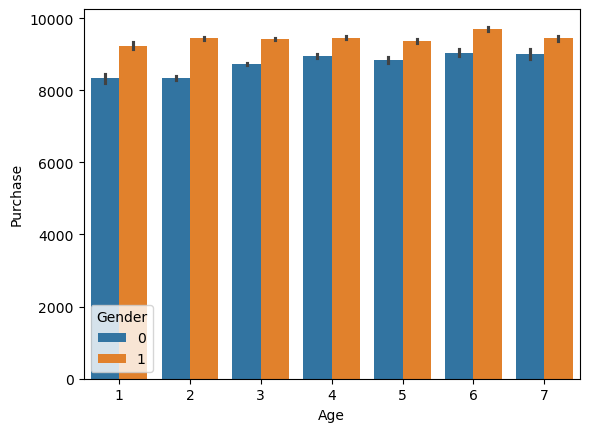

In [36]:
#Visualisation
sns.barplot(x='Age',y='Purchase',hue='Gender',data=df)
plt.show()

#From the above graph it is evident that:
Purchase rate of men is higher than women


<Axes: xlabel='Occupation', ylabel='Purchase'>

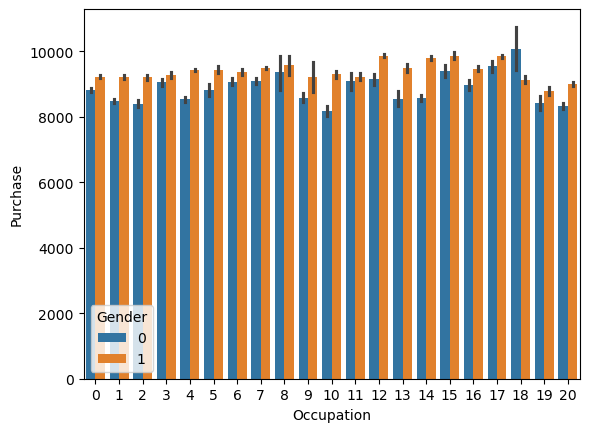

In [39]:
#Purchase wrt occupation
sns.barplot(x="Occupation",y="Purchase",hue="Gender",data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

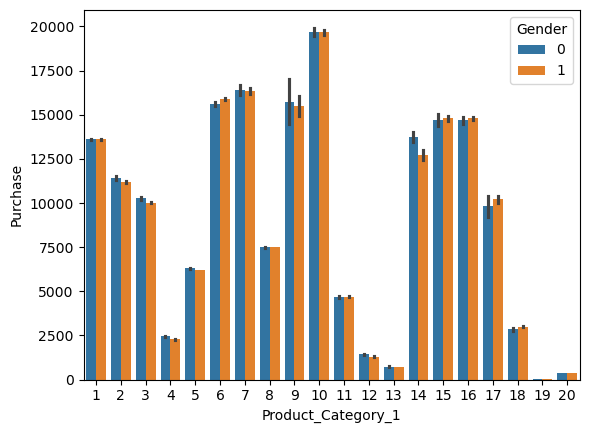

In [40]:
sns.barplot(x="Product_Category_1",y="Purchase",hue="Gender",data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

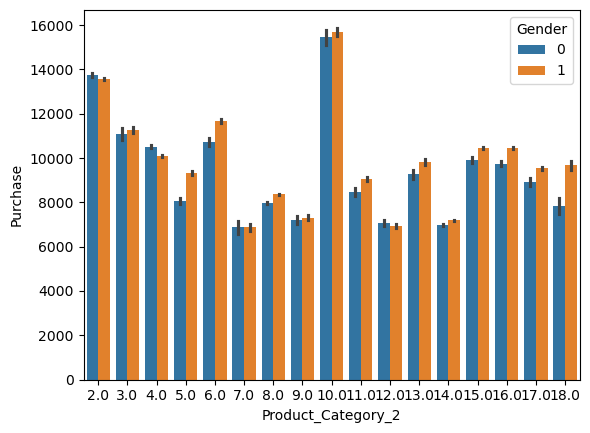

In [41]:
sns.barplot(x="Product_Category_2",y="Purchase",hue="Gender",data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

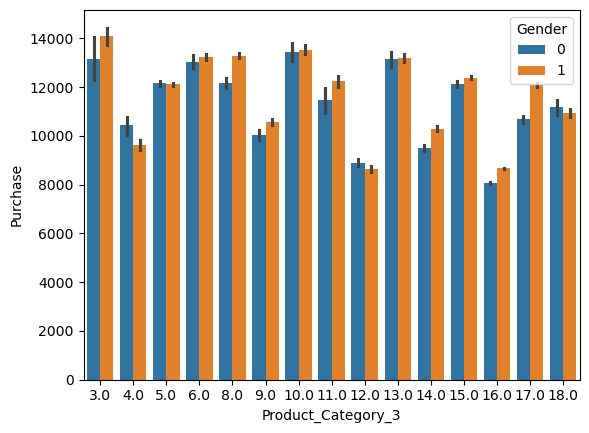

In [42]:
sns.barplot(x="Product_Category_3",y="Purchase",hue="Gender",data=df)

FEsture Scaling

Feature scaling is a technique used in machine learning to standardize the range of independent variables or features of the data. The goal is to ensure that no single feature dominates the others, and it can be particularly important for algorithms that are sensitive to the scale of the input features. Two common methods for feature scaling are Min-Max Scaling and Standardization (Z-score normalization).

Min-Max Scaling:
Min-Max Scaling (also known as normalization) scales the data between 0 and 1. The formula for Min-Max Scaling is:

�
scaled
=
�
−
�
min
�
max
−
�
min
X 
scaled
​
 = 
X 
max
​
 −X 
min
​
 
X−X 
min
​
 
​
 

where 
�
min
X 
min
​
  is the minimum value of the feature, 
�
max
X 
max
​
  is the maximum value, and 
�
X is the original value.

You can use scikit-learn's MinMaxScaler for this:

python
Copy code
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Age', 'Purchase']] = scaler.fit_transform(df[['Age', 'Purchase']])
Standardization (Z-score normalization):
Standardization transforms the data to have a mean of 0 and a standard deviation of 1. The formula for standardization is:

�
standardized
=
�
−
�
�
X 
standardized
​
 = 
σ
X−μ
​
 

where 
�
μ is the mean of the feature and 
�
σ is the standard deviation.

You can use scikit-learn's StandardScaler for this:

python
Copy code
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Purchase']] = scaler.fit_transform(df[['Age', 'Purchase']])
Choose the scaling method based on the characteristics of your data and the requirements of the machine learning algorithm you're using. Standardization is often preferred when the data has outliers, while Min-Max Scaling might be more suitable when the algorithm assumes a specific range of values for the features.






